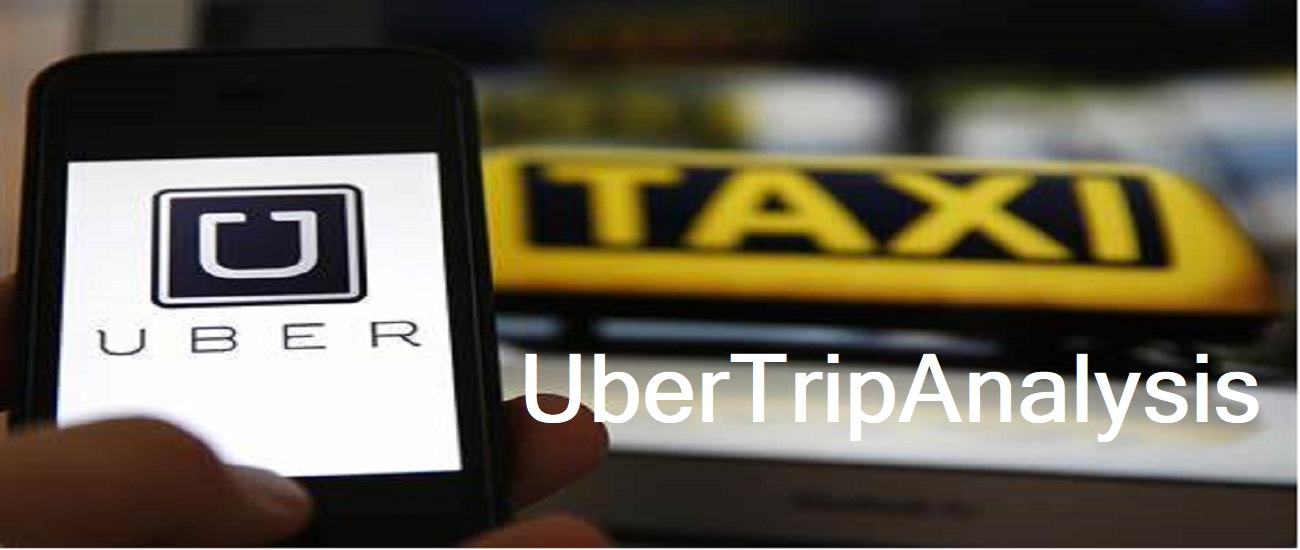

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt

In [2]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\\Uber_trip\\uber-raw-data-apr14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
df.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


### Data contains Uber trips between April 1 & April 30.

In [4]:
df.shape

(564516, 4)

In [5]:
df.size

2258064

In [6]:
df.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [7]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [9]:
df.describe()

,Lat,Lon
count,564516.000000,564516.000000
mean,40.740005,-73.976817
std,0.036083,0.050426
min,40.072900,-74.773300
25%,40.722500,-73.997700
50%,40.742500,-73.984800
75%,40.760700,-73.970000
max,42.116600,-72.066600


In [10]:
df.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

**No missing values**

### Change datatype of Date/Time column

In [11]:
df['Date']=pd.to_datetime(df['Date/Time'])
df.drop('Date/Time', axis=1, inplace=True)
df.dtypes

Lat            float64
Lon            float64
Base            object
Date    datetime64[ns]
dtype: object

### Creating new columns Day, Weekday & Hour

In [12]:
df['Day']=df['Date'].dt.day
df['Weekday']=df['Date'].dt.weekday
df['Hour']=df['Date'].dt.hour
df.head()

,Lat,Lon,Base,Date,Day,Weekday,Hour
0,40.7690,-73.9549,B02512,2014-04-01 00:11:00,1,1,0
1,40.7267,-74.0345,B02512,2014-04-01 00:17:00,1,1,0
2,40.7316,-73.9873,B02512,2014-04-01 00:21:00,1,1,0
3,40.7588,-73.9776,B02512,2014-04-01 00:28:00,1,1,0
4,40.7594,-73.9722,B02512,2014-04-01 00:33:00,1,1,0


### Distribution by Day

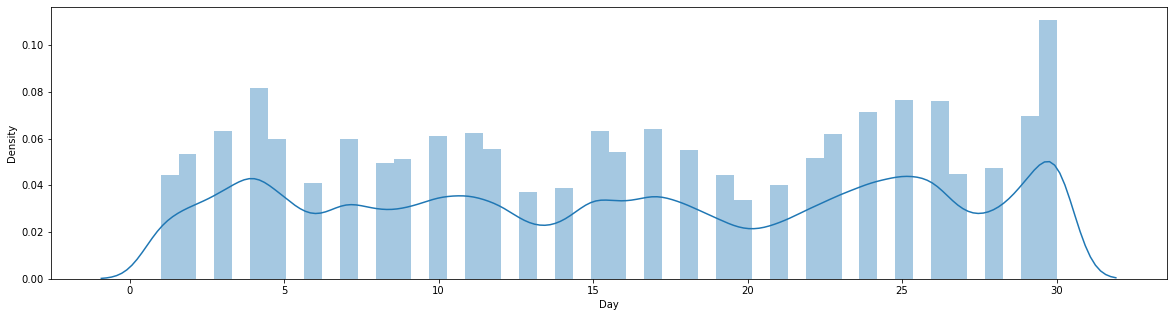

In [13]:
plt.figure(figsize=(20,5))
sns.distplot(df['Day']);

1. **Distribution of Trips by Uber on everyday is almost constant.**
2. **Highest trips is on 30 April.**
3. **From Graph we can observe a seasonality of & Days.**

### Distribution by Weekday

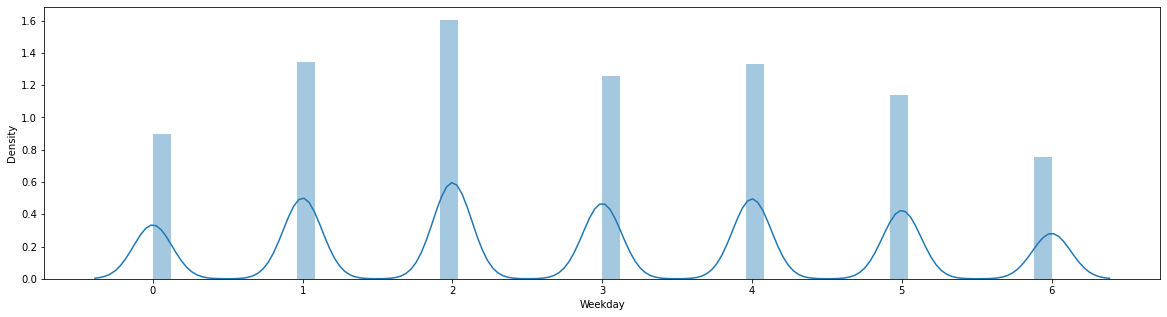

In [14]:
plt.figure(figsize=(20,5))
sns.distplot(df['Weekday']);

1. **On Working Days like Monday to Friday Uber Trips are More.**
2. **On weekend like Saturday Sunday, trips are less.**

### Distribution by Hour

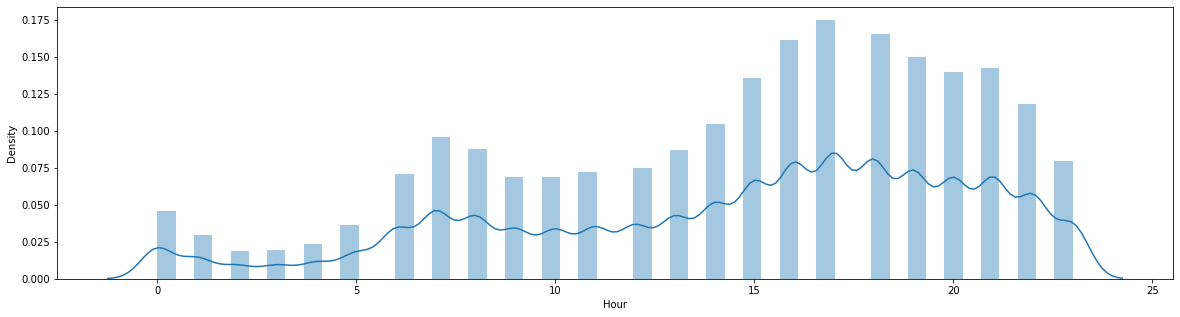

In [15]:
plt.figure(figsize=(20,5))
sns.distplot(df['Hour']);

1. **More Trips of Uber at 5 PM evening.**
2. **Count of Trips are high in the evening from 3 PM to 10 PM**
3. **Count of trips are less in the early morning from 12 AM to 5 AM.**
4. **Trips are Increasing from  Early Morning 5 Am to Evening 5 PM and then start descreasing till 3 AM, again continue**